Details about the dataset:


*   1st column - index of the row
*   2nd column - twitter message content
*   3rd column - emotional label

emotions are categorised under six categories as sadness_0, joy_1, love_2, anger_3, fear_4, surprise_5

In [ ]:
import pandas as pd

df = pd.read_csv('/content/text.csv', encoding='utf-8')

df.head()


,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4.0
1,1,ive enjoyed being able to slouch about relax a...,0.0
2,2,i gave up my internship with the dmrg and am f...,4.0
3,3,i dont know i feel so lost,0.0
4,4,i am a kindergarten teacher and i am thoroughl...,4.0


In [ ]:
# Check for null values
null_counts = df.isnull().sum()

# Print the null value counts
print(null_counts)

Unnamed: 0    0
text          0
label         1
dtype: int64


In [ ]:
df_filtered = df.dropna()

In [ ]:
# prompt: get the text section in the df and label under two variables

text = df_filtered['text'].values
label = df_filtered['label'].values

print(text.shape)
print(label.shape)


(98065,)
(98065,)


In [ ]:
vocab_size = 50000
embedding_dim = 16
max_length = 3000
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 80000

In [ ]:
training_text = text[0:training_size]
testing_text = text[training_size:]
training_labels = label[0:training_size]
testing_labels = label[training_size:]

In [ ]:
print(training_text.shape, testing_text.shape, training_labels.shape, testing_labels.shape)

(80000,) (18065,) (80000,) (18065,)


In [ ]:
from typing_extensions import Text
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(text)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_text)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_text)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [ ]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 3000, 16)          800000    
                                                                 
 global_average_pooling1d_5  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_10 (Dense)            (None, 24)                408       
                                                                 
 dense_11 (Dense)            (None, 6)                 150       
                                                                 
Total params: 800558 (3.05 MB)
Trainable params: 800558 (3.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
training_padded.shape

(80000, 3000)

In [ ]:
testing_padded.shape

(18065, 3000)

In [ ]:
training_labels.shape

(80000,)

In [ ]:
testing_labels.shape

(18065,)

In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/30
2500/2500 [==============================] - 48s 19ms/step - loss: 1.5756 - accuracy: 0.3387 - val_loss: 1.5766 - val_accuracy: 0.3362
Epoch 2/30
2500/2500 [==============================] - 46s 18ms/step - loss: 1.5692 - accuracy: 0.3392 - val_loss: 1.5747 - val_accuracy: 0.3362
Epoch 3/30
2500/2500 [==============================] - 47s 19ms/step - loss: 1.5663 - accuracy: 0.3399 - val_loss: 1.5696 - val_accuracy: 0.3362
Epoch 4/30
2500/2500 [==============================] - 52s 21ms/step - loss: 1.5532 - accuracy: 0.3809 - val_loss: 1.5420 - val_accuracy: 0.5108
Epoch 5/30
2500/2500 [==============================] - 48s 19ms/step - loss: 1.4867 - accuracy: 0.4743 - val_loss: 1.4280 - val_accuracy: 0.5273
Epoch 6/30
2500/2500 [==============================] - 47s 19ms/step - loss: 1.3076 - accuracy: 0.5594 - val_loss: 1.2026 - val_accuracy: 0.5753
Epoch 7/30
2500/2500 [==============================] - 47s 19ms/step - loss: 1.0632 - accuracy: 0.6082 - val_loss: 0.9800 -

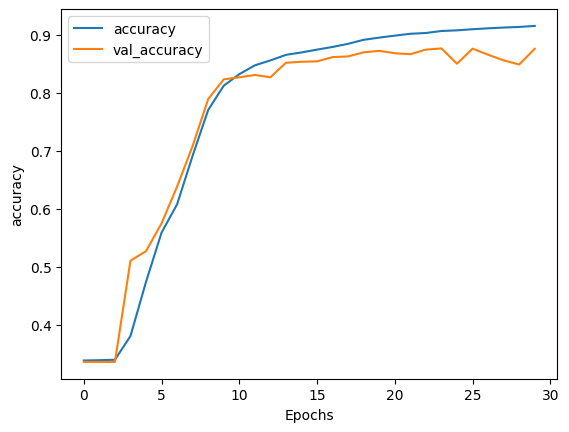

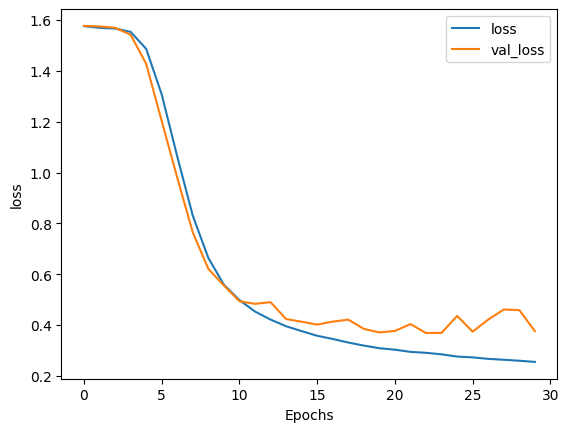

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
pred_text = ["Happy wedded life", "Congratulations", "You have a beautiful smile", "I love you"]

pred_sequences = tokenizer.texts_to_sequences(pred_text)

pred_padded = pad_sequences(pred_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


# output = model.predict(pred_padded)
# print(output)

# rounded_output = np.round(output, decimals=4)
# print(rounded_output)

# Set the printing format to display numbers in decimal form without scientific notation
np.set_printoptions(suppress=True)

# Print the output of model.predict()
print(model.predict(pred_padded))

1/1 [==============================] - 0s 30ms/step
[[0.07664086 0.8962822  0.01390101 0.00091056 0.01170573 0.00055968]
 [0.26842082 0.68900174 0.00754089 0.00502997 0.02939132 0.00061524]
 [0.09711865 0.8526758  0.01980549 0.00181506 0.02732448 0.00126058]
 [0.2778552  0.6491153  0.01046864 0.00744272 0.05393007 0.00118812]]


sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5)